# PYREX: Example Calculation on ${\rm H}_2$ + ${\rm CO}_2$ Reaction

created by: Wallace D. Derricotte

This is an example use case of the PYREX software for calculating the reaction energy. For this example we will look at the interaction of ${\rm H}_2$ and ${\rm CO}_2$, in this directory is a typical intrinsic reaction coordinate file that contains all of the geometries to describe the transformation from reactants to product. Initially you must import PYREX as a python module, here we are importing PYREX and giving it the alias "pyr" for when we access its functions.  

In [3]:
import pyrex as pyr

Now we will give the necessary molecule options to PYREX, the only thing necessary is a python list that contains the atomic symbols for your system. These must be in the same order as they appear in your IRC file. You can also supply a charge and multiplicity to PYREX, if you do not then it assumes a neutrally charge singlet. 

In [4]:
syms = ["C","O","O","H","H"]
mol_opt = pyr.MoleculeOptions(symbols=syms)

We will run a density functional theory (DFT) calculation with the minimal STO-3G basis set. These are supplied to pyREX as ModelOptions.

In [5]:
mod_opt = pyr.ModelOptions(method='dft', basis='sto-3g')

In quantum chemistry applications of DFT to chemical reactions, it is common to run multiple different density functionals on the same coordinate. Having pyREX available as a python module facilitates this type of application easily.

In [6]:
functionals = ['blyp','pbe','b3lyp','pbe0']
inputs = []
for functional in functionals:
    pyr_opt = pyr.PyrexOptions(qm_program='pyscf',xc_functional=functional,irc_stepsize=0.2,irc_filename='full_irc.xyz')
    inp = pyr.PyrexInput(molecule=mol_opt,model=mod_opt,pyrex=pyr_opt)
    inputs.append(inp)

In [8]:
reaction_energies = []
coordinates = []
for inp in inputs:
    params = pyr.params_read(inp)
    pyr.geometry_builder(params)
    pyr.energy_calculations(params) # Each Coordinate will take 30-60 secs
    coordinates.append(params.coordinates)
    reaction_energies.append(params.energies)

pySCF Time = 53.761670
pySCF Time = 60.139578
pySCF Time = 59.631212
pySCF Time = 57.868065


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

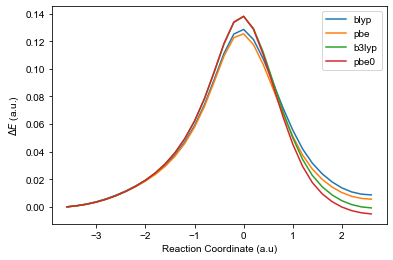

In [18]:
fig, ax = plt.subplots()
for i in range(len(reaction_energies)):
    y = np.asarray(reaction_energies[i]) - reaction_energies[i][0] # Relative Energies
    x = coordinates[i]
    ax.plot(x,y, label=functionals[i])
    plt.xlabel('Reaction Coordinate (a.u)')
    plt.ylabel('$\\Delta E$ (a.u.)')
    ax.legend()
plt.show()